# Régression Polynomiale Multivariée ( 2 feature x1,x2) - Gradient Descent


In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
%matplotlib inline


# 1. Dataset

   Pour développer un modèle polynomial à partir des équations de la régression linéaire , il suffit d'ajouter des degrés de polynome dans les colonnes de la matrice X ainsi qu'un nombre égal de lignes dans le vecteur θ.

$$
\begin{aligned}
X &= \begin{bmatrix}
X_1^{(1)} & X_2^{(1)} & (X_1^{(1)})^2 & (X_2^{(1)})^2 & X_1^{(1)} X_2^{(1)} & 1 \\
X_1^{(2)} & X_2^{(2)} & (X_1^{(2)})^2 & (X_2^{(2)})^2 & X_1^{(2)} X_2^{(2)} & 1 \\
X_1^{(3)} & X_2^{(3)} & (X_1^{(3)})^2 & (X_2^{(3)})^2 & X_1^{(3)} X_2^{(3)} & 1 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
X_1^{(n)} & X_2^{(n)} & (X_1^{(n)})^2 & (X_2^{(n)})^2 & X_1^{(n)} X_2^{(n)} & 1
\end{bmatrix}
\end{aligned}
$$






In [2]:
np.random.seed(0) # permet de reproduire l'aléatoire, on fait le seed(0) pour avoir les même valeurs aléatoires
X, y = make_regression(n_samples=100, n_features=2, noise = 10) # creation d'un dataset avec 100 exemples et 1 seul feature

# Générer une vraie relation polynomiale pour y
y = 3 * X[:, 0]**2 + 2 * X[:, 1]**2 + 1.5 * X[:, 0] * X[:, 1] + 5 + np.random.randn(100) * 2

In [3]:
# Verification des dimensions
print(X.shape)
print(y.shape)

# redimensionner y
y = y.reshape(y.shape[0], 1)
print(y.shape)
X

(100, 2)
(100,)
(100, 1)


array([[ 1.05445173, -1.07075262],
       [-0.36274117, -0.63432209],
       [-0.85409574,  0.3130677 ],
       [ 1.3263859 ,  0.29823817],
       [-0.4615846 , -1.31590741],
       [ 1.94362119, -1.17312341],
       [-1.60205766,  0.62523145],
       [-0.40178094,  0.17742614],
       [-0.97727788,  1.86755799],
       [ 0.37816252,  0.15494743],
       [-0.30230275, -0.38732682],
       [-0.74745481, -0.41361898],
       [-0.18718385,  0.04575852],
       [ 0.31872765,  0.92085882],
       [-1.53624369,  0.46566244],
       [ 0.40015721,  1.76405235],
       [-0.82643854, -0.74475482],
       [-0.74216502,  0.8644362 ],
       [ 0.70657317,  0.3563664 ],
       [ 0.90082649, -1.16514984],
       [-0.57884966, -0.87079715],
       [-0.20829876,  0.57659082],
       [ 0.68159452, -1.03424284],
       [ 0.8024564 , -0.26800337],
       [ 0.77749036, -1.25279536],
       [-1.5447711 , -1.00021535],
       [ 0.96939671, -1.270485  ],
       [ 0.67643329, -0.63584608],
       [ 1.78587049,

In [4]:
y

array([[ 7.28212002],
       [ 8.11303185],
       [ 6.59254228],
       [ 8.51996814],
       [11.72737592],
       [14.67727704],
       [12.008383  ],
       [ 2.22738125],
       [12.42705622],
       [ 6.63500768],
       [ 7.41101715],
       [ 9.56922883],
       [ 3.57455859],
       [ 7.27011602],
       [ 9.86083326],
       [11.82130687],
       [ 7.01545517],
       [ 6.72222175],
       [ 3.90894243],
       [11.43642042],
       [ 4.82709567],
       [ 6.33342351],
       [ 9.2394983 ],
       [ 7.16289506],
       [10.91413874],
       [12.13862396],
       [ 8.53000615],
       [ 3.10218222],
       [11.67261722],
       [10.38265006],
       [ 1.24148951],
       [10.98188583],
       [ 7.55235722],
       [ 5.49728284],
       [ 3.65620815],
       [ 7.83805114],
       [ 4.76396234],
       [14.32683791],
       [ 8.13829794],
       [ 7.60634926],
       [11.19965093],
       [11.56410913],
       [ 3.65458868],
       [ 8.26803497],
       [27.01726345],
       [ 4

In [5]:

# Création de la matrice X, incluant le biais

# Ajout des termes polynomiaux
X = np.hstack((X, X[:, 0:1]**2, X[:, 1:2]**2, X[:, 0:1]*X[:, 1:2]))

X = np.hstack((X, np.ones((X.shape[0], 1))))

print(X.shape)
print(X[:10])

(100, 6)
[[ 1.05445173 -1.07075262  1.11186844  1.14651118 -1.12905695  1.        ]
 [-0.36274117 -0.63432209  0.13158115  0.40236452  0.23009474  1.        ]
 [-0.85409574  0.3130677   0.72947953  0.09801139 -0.26738979  1.        ]
 [ 1.3263859   0.29823817  1.75929955  0.08894601  0.39557891  1.        ]
 [-0.4615846  -1.31590741  0.21306035  1.73161231  0.6074026   1.        ]
 [ 1.94362119 -1.17312341  3.77766331  1.37621852 -2.2801075   1.        ]
 [-1.60205766  0.62523145  2.56658873  0.39091437 -1.00165683  1.        ]
 [-0.40178094  0.17742614  0.16142792  0.03148004 -0.07128644  1.        ]
 [-0.97727788  1.86755799  0.95507205  3.48777285 -1.82512311  1.        ]
 [ 0.37816252  0.15494743  0.14300689  0.0240087   0.05859531  1.        ]]


In [6]:
# Initialisation du vecteur theta aléatoire, avec 3 éléments (car X a trois colonnes)
theta = np.random.randn(6, 1)
theta

array([[ 1.20762067],
       [-1.15179807],
       [ 0.1551826 ],
       [-0.63200906],
       [-1.81677267],
       [-0.1880149 ]])

## 2. Modèle Linéaire
On implémente un modèle selon l'équation matricielle F=X.θ et puis on teste le modèle initiale défini par la valeur initiale de θ qu'on a initialisé d'une manière aléatoire.

In [7]:
def model(X, theta):
    return X.dot(theta)

## 3. Fonction coût : Erreur Quadratique Moyenne
On mesure les erreurs du modele sur le Dataset X, y en implémenterl'erreur quadratique moyenne, Mean Squared Error (MSE) en anglais.

$$
J(\theta) = \frac{1}{2m} \sum (X \cdot \theta - y)^2
$$
Ensuite, on teste notre fonction, pour voir s'il n'y a pas de bug

In [8]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [9]:
cost_function(X, y, theta)

80.59452953898537

## 4. Gradients et Descente de Gradient
On implémente la formule du gradient pour la MSE. Ensuite on utilise cette fonction dans la descente de gradient:!

$$
\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m} X^T \cdot (X \cdot \theta - y)
$$

$$
\theta = \theta - \alpha \frac{\partial J(\theta)}{\partial \theta}
$$

In [10]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [11]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

## 5. Phase d'entrainement
On définit un nombre d'itérations, ainsi qu'un pas d'apprentissage α. Une fois le modele entrainé, on observe les resultats par rapport a notre Dataset

In [12]:
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [13]:
theta_final

array([[-0.07774037],
       [-0.30221414],
       [ 2.83863004],
       [ 2.36694945],
       [ 1.58342139],
       [ 4.68870356]])

In [14]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)


## 6. Courbe d'apprentissage

   Pour vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction cout a travers les itérations. On est sensé obtenir une courbe qui diminue a chaque itération jusqu'a stagner a un niveau minimal (proche de zéro). Si la courbe ne suit pas ce motif, alors le pas learning_rate est peut-etre trop élevé, il faut prendre un pas plus faible.

plt.plot(range(n_iterations), cost_history)

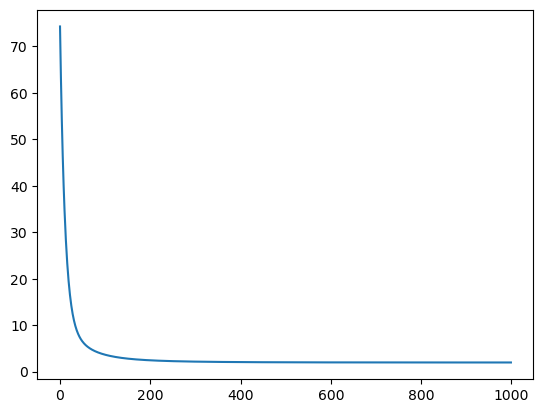

In [15]:
plt.plot(range(n_iterations), cost_history)
plt.show()

## 7. Evaluation du modèle - Coefficient de détermination

   Le coefficient de détermination est un indice de la qualité de la prédiction de la régression polynomiale. Le coefficient de détermination se sit!ue entre 0 et 1. Plus il est proche de 1, plus la régression polynomiale est en adéquation avec les données collectées.
   ### Erreur carrée relative (RSE) et \( R-squared \)

RSE : **Relative Squared Error**, l'erreur carrée relative :

$$
RSE = \frac{\sum_{i=1}^{m} (f(x_i) - y_i)^2}{\sum_{i=1}^{m} \left( y_i - \frac{1}{m} \sum_{j=1}^{m} y_j \right)^2}
$$

Le complément à 1 de la RSE est le coefficient de détermination noté : $$R^2$$\

Tel que :

$$
R^2 = 1 - RSE
$$

Le modèle idéal donne: $$R^2 = 1$$\.
   

In [16]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [17]:
coef_determination(y, predictions)

0.8650488162841853

<IPython.core.display.Javascript object>


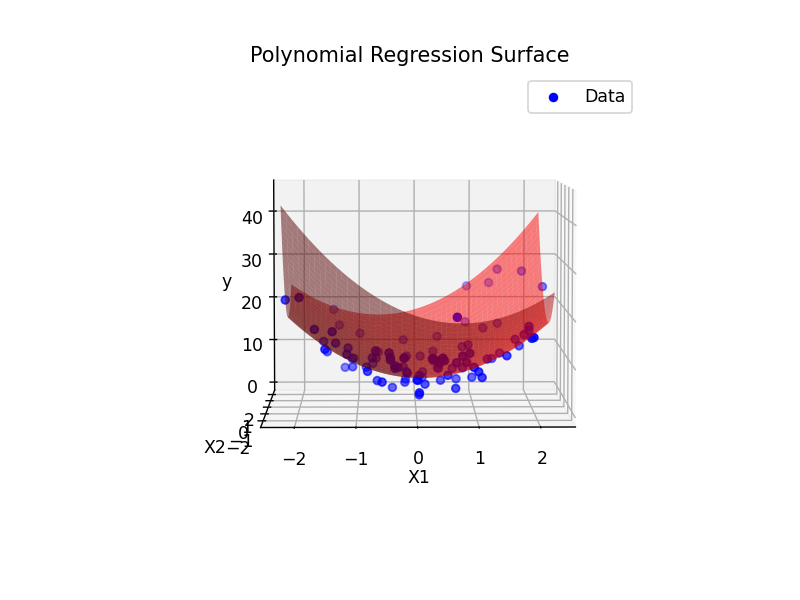

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Activer le mode interactif dans Jupyter
%matplotlib notebook  

# Génération de la grille pour affichage
X1_grid, X2_grid = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100), 
                               np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
X_grid = np.c_[X1_grid.ravel(), X2_grid.ravel()]
X_grid = np.hstack((X_grid, X_grid[:, 0:1]**2, X_grid[:, 1:2]**2, X_grid[:, 0:1]*X_grid[:, 1:2]))
X_grid = np.hstack((X_grid, np.ones((X_grid.shape[0], 1))))

# Prédiction pour la surface 3D
Y_pred_grid = model(X_grid, theta_final)
Y_pred_grid = Y_pred_grid.reshape(X1_grid.shape)

# Tracer la surface en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='b', label='Data')
ax.plot_surface(X1_grid, X2_grid, Y_pred_grid, color='r', alpha=0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
plt.title('Polynomial Regression Surface')
plt.legend()
plt.show()


Résumé du processus
1. Création d'une grille de points (X1_grid, X2_grid) couvrant l'espace des données.
2. Transformation de cette grille en un tableau de points 2D X_grid.
3. Ajout des termes quadratiques et d'interaction pour correspondre au modèle polynomial.
4. Ajout d'un terme biais pour que theta fonctionne correctement.